In [1]:
import numpy as np

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

In [3]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [4]:
a = np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

In [5]:
y_hat = a + b*zp # y_hat = 444.177+2.6205*x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [6]:
ks

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

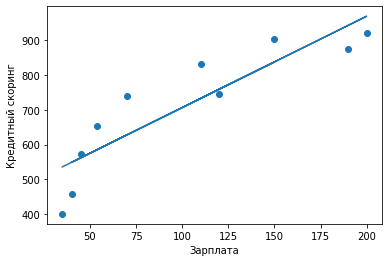

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp, ks)
plt.xlabel('Зарплата')
plt.ylabel('Кредитный скоринг')
plt.plot(zp, 444.177 + 2.621*zp)
plt.show()

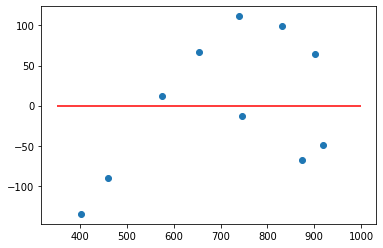

In [8]:
plt.scatter(ks, ks-y_hat) # Посмотрим остатки, насколько они близки к 0
plt.hlines(y=0, xmin =350, xmax = 1000, color='red')
plt.show()

In [9]:
mse = ((ks-y_hat)**2).sum()/n
mse

6470.414201176658

In [10]:
mse1 = ((ks-y_hat)**2).mean()
mse1

6470.414201176658

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
mean_squared_error(y_hat, ks)

6470.414201176658

In [13]:
x = zp
y = ks
b2 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
b2

2.620538882402765

In [14]:
a2 = np.mean(y) - b2 * np.mean(x)
a2

444.1773573243596

In [15]:
r = b2 * np.std(x) / np.std(y)
r

0.8874900920739162

In [16]:
R2 = r**2
R2

0.7876386635293682

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(ks, y_hat)

0.7876386635293686

In [19]:
y_pred = a2 + b2 * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [20]:
(np.abs(ks-y_pred)).mean()

70.98040656548312

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mean_absolute_error(ks, y_pred)

70.98040656548312

##### Без intercept

In [ ]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

In [45]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2)-np.mean(zp)**2)
b

2.620538882402765

In [46]:
y_hat = 2.6205 * ks

In [47]:
mse = ((ks-y_hat)**2).mean()
mse

1403415.8615447248

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [23]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

In [24]:
x = zp.reshape((10,1))
y = ks.reshape((10,1))

In [25]:
B = np.dot(np.linalg.inv(np.dot(x.T, x)), x.T@y)
B

array([[5.88982042]])

In [26]:
def mse_(B1, y=y, x=x, n=10):
    return np.sum((B1*x-y)**2)/n 

In [27]:
B1 = 0.1
n = 10
alpha = 1e-6

In [28]:
# for i in range (200):
#     B1-=alpha*(2/n)*np.sum((B1*x-y)*x)
#     if i%20==0:
#         print(f'Iteration:{i}, B1 = {B1}, mse = {mse_(B1)}')

In [29]:
for i in range (500):
    B1-=alpha*(2/n)*np.sum((B1*x-y)*x)
    if i%50==0:
        print(f'Iteration:{i}, B1 = {B1}, mse = {mse_(B1)}')

Iteration:0, B1 = 0.25952808, mse = 493237.7212546963
Iteration:50, B1 = 4.497229618367758, mse = 83233.94472982832
Iteration:100, B1 = 5.54537842245223, mse = 58151.31823171113
Iteration:150, B1 = 5.804626485478126, mse = 56616.849068093856
Iteration:200, B1 = 5.868748638669329, mse = 56522.97550129376
Iteration:250, B1 = 5.884608547059329, mse = 56517.232638059555
Iteration:300, B1 = 5.888531320728348, mse = 56516.88130936019
Iteration:350, B1 = 5.889501575592372, mse = 56516.85981627392
Iteration:400, B1 = 5.8897415574471985, mse = 56516.85850140053
Iteration:450, B1 = 5.889800914315978, mse = 56516.858420961085


In [30]:
# Iteration:300, B1 = 5.888531320728348, mse = 56516.88130936019
# y_pred = 5.888*x

In [31]:
#r2_score(y, y_pred)

#### 3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента? 

Если известна дисперсия генеральной выборки, то используется таблица значений функции Лапласа.

Если дисперсия генеральной выборки не известна - таблица критических точек распределения Стьюдента.

#### *4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [32]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

In [33]:
x = np.hstack([np.ones((10,1)), zp.reshape((10,1))])
y = ks.reshape((10,1))

In [34]:
def mse_(B0, B1, y=y, x=x, n=10):
    return np.sum((B0+B1*x-y)**2)/n 

In [43]:
B0 = 0.1
B1 = 0.1
n = 10
alpha = 1e-6

In [44]:
for i in range (1000):
    B0-=alpha*(2/n)*np.sum((B0+B1*x-y))
    B1-=alpha*(2/n)*np.sum((B0+B1*x-y)*x)
    if i%100==0:
        print(f'Iteration:{i},B0 = {B0} B1 = {B1}, mse = {mse_(B0, B1)}')

Iteration:0,B0 = 0.10845616000000001 B1 = 0.582776404535296, mse = 977835.6970173928
Iteration:100,B0 = 0.6348272256585547 B1 = 5.935643101332332, mse = 581550.3502834011
Iteration:200,B0 = 1.12102883903605 B1 = 5.932987418752313, mse = 580762.3493533806
Iteration:300,B0 = 1.6068620670242366 B1 = 5.929376407773717, mse = 579975.5326182917
Iteration:400,B0 = 2.092334297754526 B1 = 5.9257679086938015, mse = 579189.8847295518
Iteration:500,B0 = 2.5774458007368 B1 = 5.922162090860705, mse = 578405.4039506245
Iteration:600,B0 = 3.0621968440082603 B1 = 5.918558952312772, mse = 577622.0885477241
Iteration:700,B0 = 3.5465876954067173 B1 = 5.91495849105917, mse = 576839.9367896396
Iteration:800,B0 = 4.03061862257097 B1 = 5.911360705110556, mse = 576058.9469477327
Iteration:900,B0 = 4.5142898929409405 B1 = 5.907765592479054, mse = 575279.1172959327


In [37]:
y_pred = 1.6 + 5.929*zp

In [38]:
r2_score(y, y_pred)

-0.8442656742861314

In [39]:
import fastai
print('fast.ai version is:', fastai.__version__)

from fastai import *

ModuleNotFoundError: No module named 'fastai'